In [39]:
import cv2
import numpy as np
from PIL import Image


import pytesseract
import os 


def showImg(mat):
    rgbMAT = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)

    return Image.fromarray(rgbMAT)

def showMultipleImg(mats):
    from matplotlib import pyplot as plt
    def inner(x):
        x1 = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        return Image.fromarray(x1) 
    
    l = list(map(inner, mats))
    for p in l:
        plt.figure()
        plt.imshow(p)
    
    
    

In [40]:
def  get_text_bottom_line(img):
    # todo
    return 1

def preprocess(img):
    width, height = img.size
    new_height = int(height * get_text_bottom_line(img))  # Cut image height by 30%
    
    new_top = 0
    
    
    img = img.crop((0, new_top, width, new_height))
    
    # img.show()
    
    return img
    


def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    img = Image.open(filename)
    imgp = preprocess(img)
    text = pytesseract.image_to_string(imgp, lang='chi_sim')  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text
    
def process_directory(directory):
    """
    This function will process all PNG files in the specified directory
    """
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            print(f"Processing {filename}")
            print(ocr_core(os.path.join(directory, filename)))
            exit(1)

In [41]:
# process_directory('./imgs/')  # replace with your directory

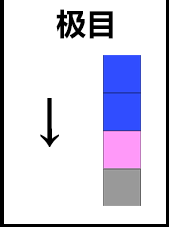

In [42]:
# cv recog coloured blocks
target_color = ['blue', 'pink', 'grey','text']
# 调色盘
color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
              'blue': {'Lower': np.array([200, 0, 0]), 'Upper': np.array([255, 100, 100])},
              'pink': {'Lower': np.array([248, 150, 250]), 'Upper': np.array([251, 155, 255])},
              'grey': {'Lower': np.array([150, 150, 150]), 'Upper': np.array([155, 155, 155])},
              'text': {'Lower': np.array([252, 252, 252]), 'Upper': np.array([255,255,255])},
              }

img = cv2.imread('imgs/card_0.png')
showImg(img)

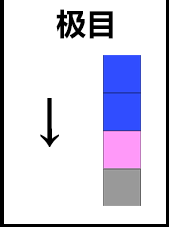

In [43]:
# 高斯模糊
# afterGsB = cv2.GaussianBlur(img, (5, 5), 0)
afterGsB = img
showImg(afterGsB)

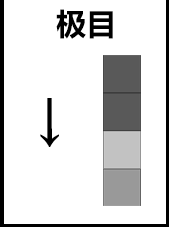

In [44]:
gray = cv2.cvtColor(afterGsB, cv2.COLOR_BGR2GRAY)
showImg(gray)


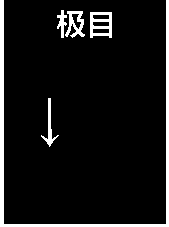

In [45]:
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
showImg(thresh)

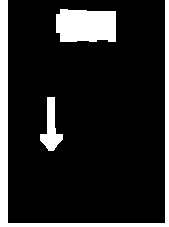

In [46]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
dilate = cv2.dilate(thresh, kernel, iterations=2)
erode = cv2.erode(dilate, kernel, iterations=1)

showImg(erode)

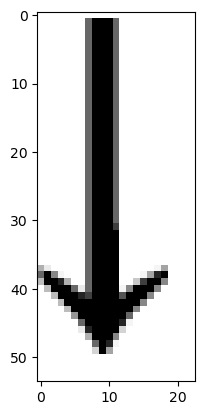

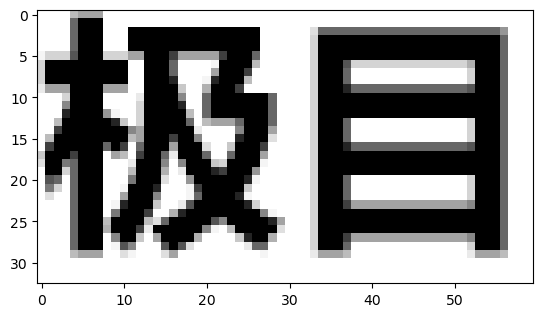

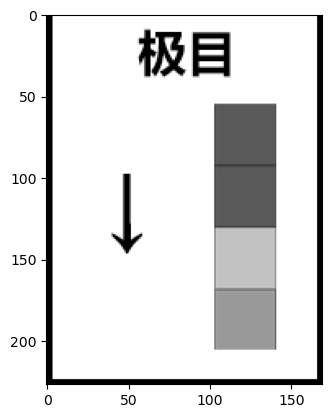

In [47]:
contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rois = []
for cont in contours:
    x, y, w, h = cv2.boundingRect(cont)
    # region of interest
    roi = gray[y:y+h, x: x+w]
    rois.append(roi)
    

# showImg(rois[1])
showMultipleImg(rois)

In [48]:
for roi in rois:
    text = pytesseract.image_to_string(roi, lang='chi_sim')
    print(text)


In [49]:
# 色调（H），饱和度（S），明度（V）
# afterHSV = cv2.cvtColor(afterGsB, cv2.COLOR_BGR2HSV)
# showImg(afterHSV)


In [50]:
# 粗线条的变细
# afterErode = cv2.erode(afterHSV, None, iterations = 2)
# showImg(afterErode)

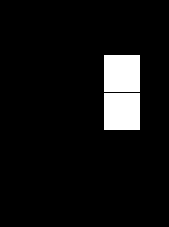

In [51]:
mask = cv2.inRange(afterGsB, color_dist[target_color[0]]['Lower'], color_dist[target_color[0]]['Upper'])
showImg(mask)

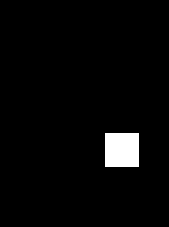

In [52]:
mask = cv2.inRange(afterGsB, color_dist[target_color[1]]['Lower'], color_dist[target_color[1]]['Upper'])
showImg(mask)

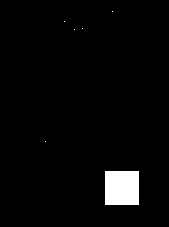

In [53]:
mask = cv2.inRange(afterGsB, color_dist[target_color[2]]['Lower'], color_dist[target_color[2]]['Upper'])
showImg(mask)

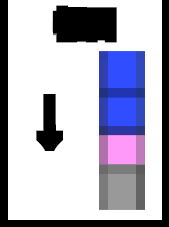

In [54]:
# 粗线条的变细
afterErode = cv2.erode(afterGsB, None, iterations = 4)
showImg(afterErode)

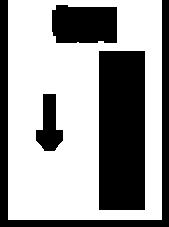

In [55]:
mask = cv2.inRange(afterErode, color_dist[target_color[3]]['Lower'], color_dist[target_color[3]]['Upper'])
showImg(mask)

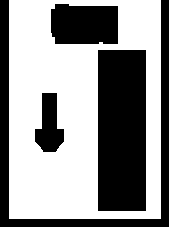

In [56]:
# 粗线条的变细
afterErode = cv2.erode(mask, None, iterations = 1)
showImg(afterErode)